#Existe relação entre competitividade e o desempenho da Bolsa brasileira?

---
Este trabalho tem como objetivo principal, observar de forma sucinta em que medida o desempenho da bolsa brasileira ao longo dos anos pode ter relação com a melhoria ou piora da competitividade brasileira.

Para tal, utilizaremos o principal benchmark da bolsa do Brasil; o Índice Bovespa que tem em sua cesta de ações as principais empresas brasileiras, que inclusive tem força sobre o ambiente regulatório nacional, como Vale, AmBev, Itaú, Bradesco entre outros.

E para a competitividade entendemos que a melhor métrica disponível hoje é a presente no relatório anual Doing Business do Banco Mundial que desde 2004 analisa uma série de fatores para definir a facilidade de se fazer negócios num país e por consequência sua competitividade.

Além do score final do relatório, também olharemos algumas métricas específicas que se relacionam com a Bolsa de valores:     
- Ease of Starting a Business;
- Ease of Getting Credit;
- Protecting Minority Investors (capacidade);
- Ease of Paying Taxes;
- Ease of Trading Across Borders.

As sequências de registros dessas métricas serão diferentes devido à mudanças na metodologia e tomamos a decisão no presente trabalho de não misturar dados de duas metodologias distintas garantindo assim integridade e sentido dos dados utilizados.




# Metodologia do Doing Bussines

  Com o intuito de facilitar a compreensão do leitor, apresentaremos, de forma resumida, a metodologia adotada pelo Banco Mundial em cada métrica (THE WORLD BANK, 2021) escolhida para o presente trabalho. Vale a ressalva de que os dados, em sua grande maioria são recolhidos através de um questionário aplicado a advogados financeiros e verificados através da análise de leis e regulamentos, bem como de fontes públicas. Por fim, os valores são confirmados por meio de teleconferências ou visitas nas economias:

**Starting a Business: **

O score dessa métrica é calculada a partir do tempo e custo  para que um civil abra uma indústria ou um comércio, como também o requisito mínimo de capital . Esses procedimentos são as aprovações, licenças, autorizações necessárias e concluem todas as notificações, verificações ou inscrições necessárias para a empresa e funcionários junto às autoridades competentes (DJANKOV; LA PORTA; SHLEIFER, 2002).

**Getting Credit:**

São medidas aqui a relação entre credores e investidores. Os indicadores utilizados são: primeiramente se as características que facilitam os empréstimos existem nas leis aplicáveis de garantias e falências; em segundo a acessibilidade das informações de crédito disponíveis por meio de provedores de serviços de relatórios de crédito, como agências de crédito ou registros de crédito (DJANKOV; MCLIESH; SHLEIFER, 2007).


**Protecting Minority:**

Essa métrica é medida a proteção de pequenos investidores e os direitos dos acionistas na governança corporativa. Para isso, verifica-se a proteção dos acionistas contra o uso indevido de ativos corporativos pelos diretores para ganho pessoal. Essa parte é dividida em três índices: transparência de transações, capacidade de processar e responsabilizar os conselheiros por negociação própria e acesso a evidências e alocação de despesas legais em litígios de acionistas (DJANKOV; LA PORTA, 2008).

**Paying Taxes:**
Os impostos, sejam eles federal, estadual ou local, são calculados de acordo com os valores que uma empresa média tem que pagar no decorrer de um ano, assim como a carga administrativa de pagamento de impostos e contribuições e do cumprimento dos procedimentos de pós-arquivamento. Esses impostos incluem lucro ou imposto de renda corporativo, contribuições sociais e impostos trabalhistas pagos pelo empregador, de propriedade, de transferência de propriedade, imposto sobre dividendos, imposto sobre ganhos de capital, imposto sobre transações financeiras, impostos de coleta de resíduos, impostos sobre veículos e estradas, etc (DJANKOV, 2010a).

**Trading across Borders:**

Nessa variável, basicamente são registrados tempo e o custo do processo logístico – exportação e importação – das mercadorias. Verifica-se a complacência documental e de fronteira. A movimentação domestica não entra como variável pois os fatores que o estrutura como geografia e topografia do território de trânsito e a proximidade do porto ou fronteira não representam elementos sobre políticas de reformas comerciais. São verificados os custos associados à com os requisitos documentais de todas as agências governamentais da economia de origem, da economia de destino e de quaisquer economias de trânsito, como também os regulamentos alfandegários, as inspeções que são obrigatórias para que a remessa viaje, bem como o tempo e o custo do manuseio que ocorre em seu porto ou fronteira (DJANKOV, 2010b).










In [ ]:
#Lendo bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
%matplotlib inline

##Importando os datasets

In [ ]:
#Dados IBOVESPA
df_ibov = pd.read_excel('https://github.com/EnzoGolfetti/praticas_python/blob/main/trabalho_final_politica_internacional/dados_IBOV_2006_2020.xlsx?raw=true', 
                   sheet_name='IBOV')
df_ibov = df_ibov.rename(columns={'Date':'data_ref','Close':'fechamento'})
close = df_ibov['fechamento']
df_ibov = df_ibov.drop(columns=['fechamento'])
df_ibov['year'] = df_ibov['data_ref'].dt.year
df_ibov['month'] = df_ibov['data_ref'].dt.month
df_ibov['day'] = df_ibov['data_ref'].dt.day
df_ibov['data_ref'] = pd.to_datetime(df_ibov['data_ref'], yearfirst=True, format='%d/%m/%Y', exact=False)
df_ibov['fechamento'] = close
df_ibov.head()

,data_ref,year,month,day,fechamento
0,2006-05-09 16:56:00,2006,5,9,41515.0
1,2006-05-10 16:56:00,2006,5,10,41979.0
2,2006-05-11 16:56:00,2006,5,11,41751.0
3,2006-05-12 16:56:00,2006,5,12,40847.0
4,2006-05-15 16:56:00,2006,5,15,40211.0


In [ ]:
#Dados Ease of Doing Business
df_ease_db = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/trabalho_final_politica_internacional/dataframe_ease_doing_business.csv', 
                         sep=',', decimal=',')
df_ease_db['DB Year'] = pd.to_datetime(df_ease_db['DB Year'], yearfirst=True, format='%Y', exact=False)
df_ease_db.tail()

,Economy,Region,Income group,DB Year,Ease of doing business score (DB17-20 methodology)
46,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2019-01-01,59.00832
47,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2019-01-01,58.32991
48,Brazil,Latin America & Caribbean,Upper middle income,2020-01-01,59.08307
49,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2020-01-01,59.46448
50,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2020-01-01,58.83922


In [ ]:
#Dados Getting Credit
df_get_credit = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/trabalho_final_politica_internacional/dataframe_getting_credit.csv',
                            sep=',', decimal=',')
df_get_credit['DB Year'] = pd.to_datetime(df_get_credit['DB Year'], yearfirst=True, format='%Y', exact=False)
df_get_credit.tail()

,Economy,Region,Income group,DB Year,Score-Getting credit (DB15-20 methodology)
46,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2019-01-01,50.0
47,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2019-01-01,50.0
48,Brazil,Latin America & Caribbean,Upper middle income,2020-01-01,50.0
49,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2020-01-01,50.0
50,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2020-01-01,50.0


In [ ]:
#Dados paying taxes
df_pay_tax = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/trabalho_final_politica_internacional/dataframe_paying_taxes.csv',
                         sep=',', decimal=',')
df_pay_tax['DB Year'] = pd.to_datetime(df_pay_tax['DB Year'], yearfirst=True, format='%Y', exact=False)
df_pay_tax.tail()

,Economy,Region,Income group,DB Year,Score-Paying taxes (DB17-20 methodology),Score-Total tax and contribution rate (% of profit)
46,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2019-01-01,34.38261,39.73226
47,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2019-01-01,34.41324,41.52147
48,Brazil,Latin America & Caribbean,Upper middle income,2020-01-01,34.40093,40.8222
49,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2020-01-01,34.38261,39.73226
50,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2020-01-01,34.41264,41.51905


In [ ]:
#Dados Protecting Minority Investors
df_pmi = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/trabalho_final_politica_internacional/dataframe_protecting_minority_investors.csv',
                     sep=',', decimal=',')
df_pmi['DB Year'] = pd.to_datetime(df_pmi['DB Year'], yearfirst=True, format='%Y', exact=False)
df_pmi.tail()

,Economy,Region,Income group,DB Year,Score-Protecting minority investors (DB15-20 methodology)
46,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2019-01-01,62.0
47,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2019-01-01,62.0
48,Brazil,Latin America & Caribbean,Upper middle income,2020-01-01,62.0
49,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2020-01-01,62.0
50,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2020-01-01,62.0


In [ ]:
#Dados Starting a Business
df_stab = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/trabalho_final_politica_internacional/dataframe_start_a_business.csv',
                      sep=',', decimal=',')
df_stab['DB Year'] = pd.to_datetime(df_stab['DB Year'], yearfirst=True, format='%Y', exact=False)
df_stab.tail()

,Economy,Region,Income group,DB Year,Score-Starting a business
46,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2019-01-01,80.23852
47,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2019-01-01,80.40346
48,Brazil,Latin America & Caribbean,Upper middle income,2020-01-01,81.29475
49,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2020-01-01,80.84471
50,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2020-01-01,81.58248


In [ ]:
#Dados Trading Across Borders
df_tacb = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/trabalho_final_politica_internacional/dataframe_trading_across_borders.csv',
                      sep=',', decimal=',')
df_tacb['DB Year'] = pd.to_datetime(df_tacb['DB Year'], yearfirst=True, format='%Y', exact=False)
df_tacb.tail()

,Economy,Region,Income group,DB Year,Score-Trading across borders (DB16-20 methodology)
46,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2019-01-01,69.85197
47,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2019-01-01,69.85197
48,Brazil,Latin America & Caribbean,Upper middle income,2020-01-01,69.85197
49,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2020-01-01,69.85197
50,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2020-01-01,69.85197


Uma primeira observação, é a de que o Banco Mundial no relatório Doing Business divide o Brasil em três partes:
- Brasil;
- Brasil olhando apenas para São Paulo - principal economia do país;
- Brasil olhando apenas para Rio de Janeiro - segunda principal economia do país.

No geral, as pontuações não se movem tanto de um ano para outro principalmente porque mudanças da magnitude das que são medidas não ocorrem no curto prazo, mas sim são em sua maioria métricas de desenvolvimento de longo prazo de uma economia.

##Análise do IBOVESPA

---
Nessa seção vamos olhar detalhadamente para o desenvolvimento do IBOVESPA ao longo dos anos e observar turn points negativos ou positivos no índice.


In [ ]:
df_ibov.head()

,data_ref,year,month,day,fechamento
0,2006-05-09 16:56:00,2006,5,9,41515.0
1,2006-05-10 16:56:00,2006,5,10,41979.0
2,2006-05-11 16:56:00,2006,5,11,41751.0
3,2006-05-12 16:56:00,2006,5,12,40847.0
4,2006-05-15 16:56:00,2006,5,15,40211.0


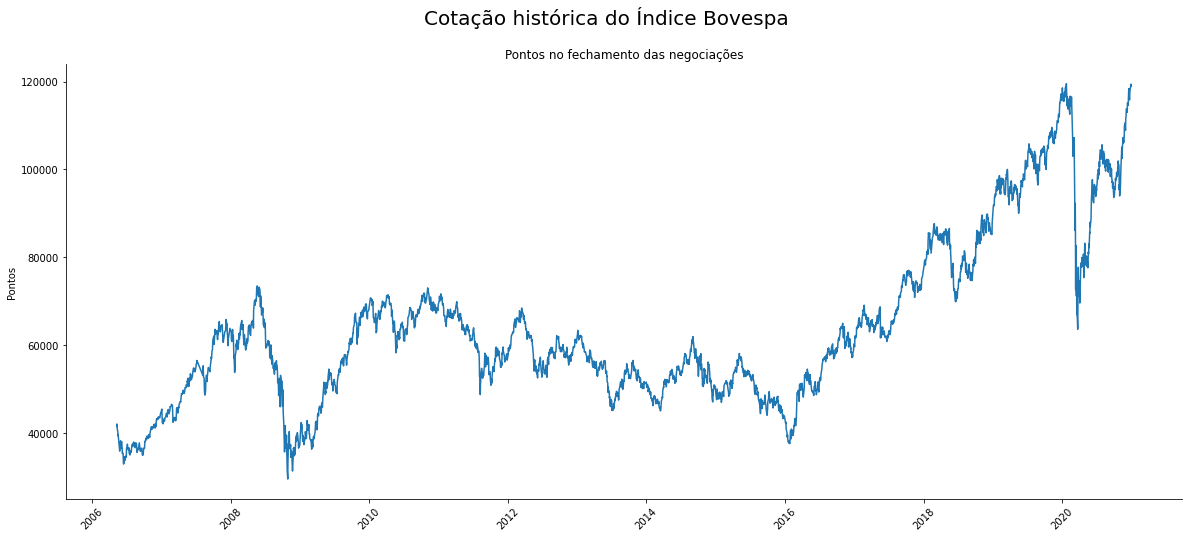

In [ ]:
#Plot a line chart
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_ibov, x='data_ref', y='fechamento', ax=ax)
ax.set_xlabel(None)
plt.tick_params('x', labelrotation=45)
ax.set_ylabel('Pontos')
ax.set_title('Pontos no fechamento das negociações')
plt.suptitle("Cotação histórica do Índice Bovespa", fontsize=20)

sns.despine()
plt.show()

No gráfico acima podemos ter uma ideia inicial da performance do Índice Bovespa desde 2006 até final de 2020. E a primeira observação que temos é a de que a um grande deslocamento de direção a partir de 2017 com constante tendência de alta, ao mesmo tempo que pós-crise de 2008 apesar de um momento de retomada havia tendência de queda no índice.

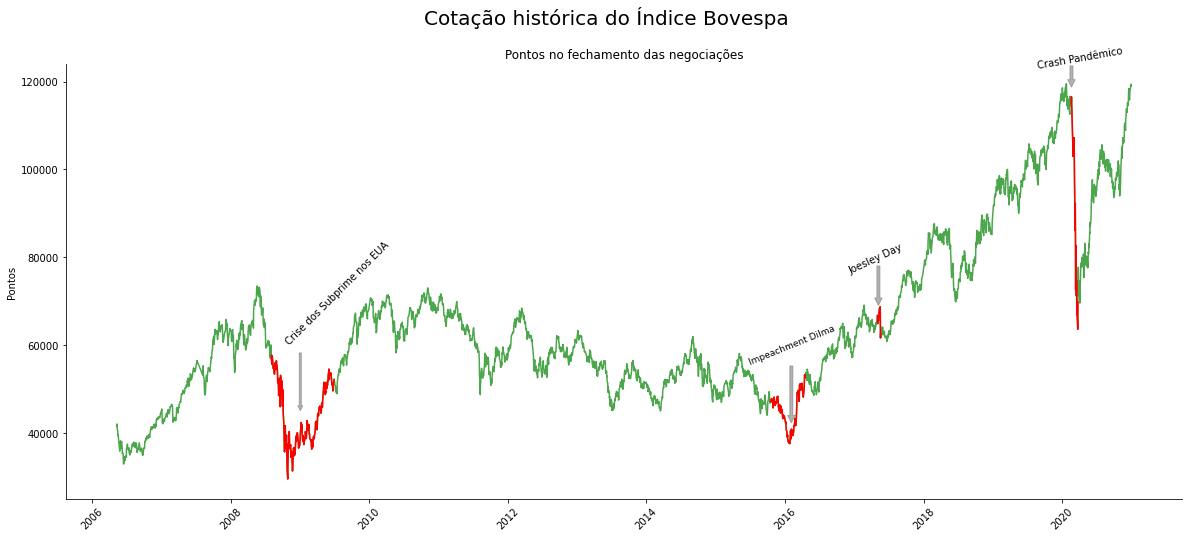

In [ ]:
#Observando turnpoints
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_ibov, x='data_ref', y='fechamento', ax=ax, color='green', alpha=0.7)
sns.lineplot(data=df_ibov[(df_ibov['data_ref']>='2017-05-01') & (df_ibov['data_ref']<='2017-05-20')], x='data_ref', y='fechamento', ax=ax, color='red') #Joesley Day
sns.lineplot(data=df_ibov[(df_ibov['data_ref']>='2008-08-01') & (df_ibov['data_ref']<='2009-06-30')], x='data_ref', y='fechamento', ax=ax, color='red') #Crise dos subprimes
sns.lineplot(data=df_ibov[(df_ibov['data_ref']>='2020-02-18') & (df_ibov['data_ref']<='2020-03-25')], x='data_ref', y='fechamento', ax=ax, color='red') #Início da pandemia
sns.lineplot(data=df_ibov[(df_ibov['data_ref']>='2015-10-15') & (df_ibov['data_ref']<='2016-04-17')], x='data_ref', y='fechamento', ax=ax, color='red') #Impeachment Dilma

#Fazer setas com textos indicando cada um dos pontos
arrow_subprime = mpatches.FancyArrowPatch((0.21, 0.34), (0.21,0.198),
                                 mutation_scale=10,
                                 transform=ax.transAxes, color='gray', alpha=0.6)
ax.add_patch(arrow_subprime)
ax.text(0.195,0.355, 'Crise dos Subprime nos EUA', transform=ax.transAxes, rotation=45, fontsize=10)

arrow_joesley = mpatches.FancyArrowPatch((0.728, 0.54), (0.728,0.44),
                                 mutation_scale=15,
                                 transform=ax.transAxes, color='gray', alpha=0.6)
ax.add_patch(arrow_joesley)
ax.text(0.7,0.52, 'Joesley Day', transform=ax.transAxes, rotation=25, fontsize=10)

arrow_pandemia = mpatches.FancyArrowPatch((0.901, 1), (0.901,0.942),
                                 mutation_scale=15,
                                 transform=ax.transAxes, color='gray', alpha=0.6)
ax.add_patch(arrow_pandemia)
ax.text(0.87,0.99, 'Crash Pandêmico', transform=ax.transAxes, rotation=10, fontsize=10)

arrow_impeachment = mpatches.FancyArrowPatch((0.65, 0.31), (0.65,0.17),
                                 mutation_scale=15,
                                 transform=ax.transAxes, color='gray', alpha=0.6)
ax.add_patch(arrow_impeachment)
ax.text(0.6105,0.31, 'Impeachment Dilma', transform=ax.transAxes, rotation=22, fontsize=9)

plt.tick_params('x', labelrotation=45)
ax.set_xlabel(None)
ax.set_ylabel('Pontos')
ax.set_title('Pontos no fechamento das negociações')
plt.suptitle("Cotação histórica do Índice Bovespa", fontsize=20)

sns.despine()
plt.show()

Como citado, decidimos destacar alguns *turnpoints* do índice e que depois poderemos comparar com a performance brasileira nos Rankings:

1. A Crise global de 2008 influenciou no ambiente competitivo brasileiro e reduziu a pontuação? (Nossa intuição é de que sim);
2. O Impeachment de Dilma em 2016 que tem indicativo de ser o ínicio da tendência de alta no Índice pode ter elevado também a pontuação de competitividade brasileira? (Nossa intuição é de que sim);
3. O "Joesley Day" em 2017 foi um evento importante para a questão de competitividade brasileira ou apenas influenciou a política e macroeconomia do país?
4. O Crash pandêmico que interrompeu as tendências de alta das bolsas ao redor do mundo, impactou também nos rankings de competividade do Brasil?

##Análise das Métricas

---
Nesta seção, vamos plotar e observar as métricas selecionadas para entender melhor seu desenvolvimento e primeiras conclusões. 


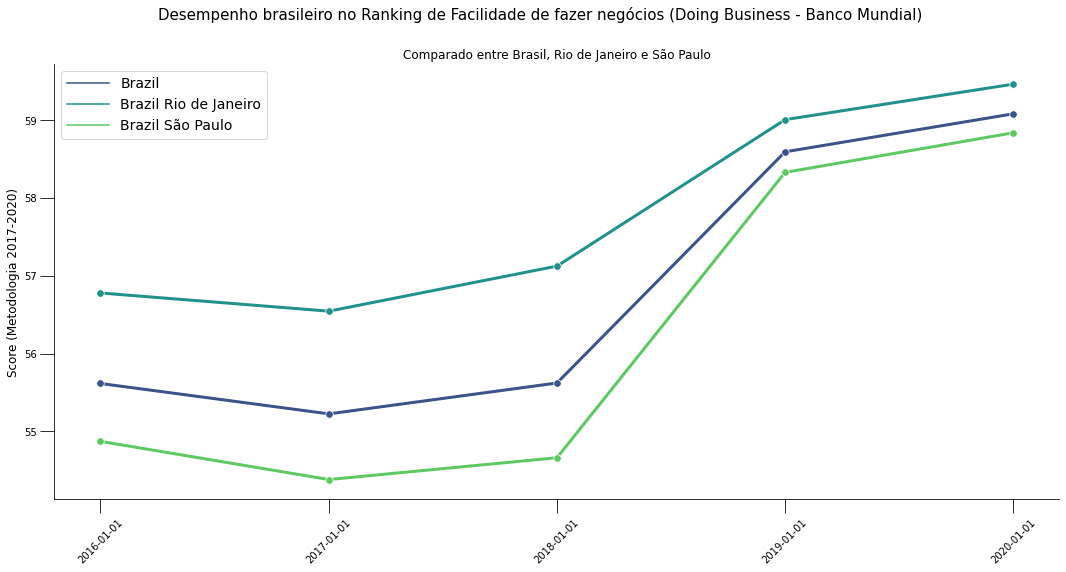

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(data=df_ease_db, x='DB Year', y='Ease of doing business score (DB17-20 methodology)', hue='Economy', ax=ax, palette='viridis', alpha=1, linewidth=3, marker='.',
             ms=15)

xmajor_locator = mdates.YearLocator(base=1)
ax.xaxis.set_major_locator(xmajor_locator)
plt.tick_params('x', labelrotation=45, size=14)
plt.tick_params('y', size=14)
ax.set_xlabel(None)
ax.set_ylabel('Score (Metodologia 2017-2020)', fontsize=12)
ax.set_title('Comparado entre Brasil, Rio de Janeiro e São Paulo', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de Facilidade de fazer negócios (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.legend(fontsize=14, handlelength=3)
plt.show()

O "DB-Score" como é comum chamado esse ranking, é o mais generalista de todos os medidos pelo Banco Mundial. ele na verdade tem a intenção de resumir o desempenho do país nas categorias em apenas um número.

Outras notações importantes identificadas ao plotar os dados:

- O Brasil é medido entre três seções diferentes; pontuação geral do Brasil (Brazil), pontuação da cidade do Rio de Janeiro (Brazil Rio de Janeiro) e pontuação da cidade de São Paulo (Brazil São Paulo);
- Intuitivamente esperávamos que por São Paulo responder por mais de 1/3 do PIB brasileiro, o Estado e consequentemente a cidade tivesse a melhor pontuação, no entanto, esse não foi o caso, mas sim, a cidade do Rio de Janeiro quem tem as melhores pontuações em todos os anos da metodologia 17-20, superando a própria pontuação do Brasil. Veremos se nas outras métricas esse continua a ser o caso;
- Um último ponto que começamos a observar é que nossa intuição sobre o impeachment de Dilma Rousseff entre 2016 e 2017 pode ter alguma relação (a pontuação cai entre esses anos) e porém Michel Temer ao assumir leva a uma tendência de alta que se mantém juntamente com o Índice Bovespa.


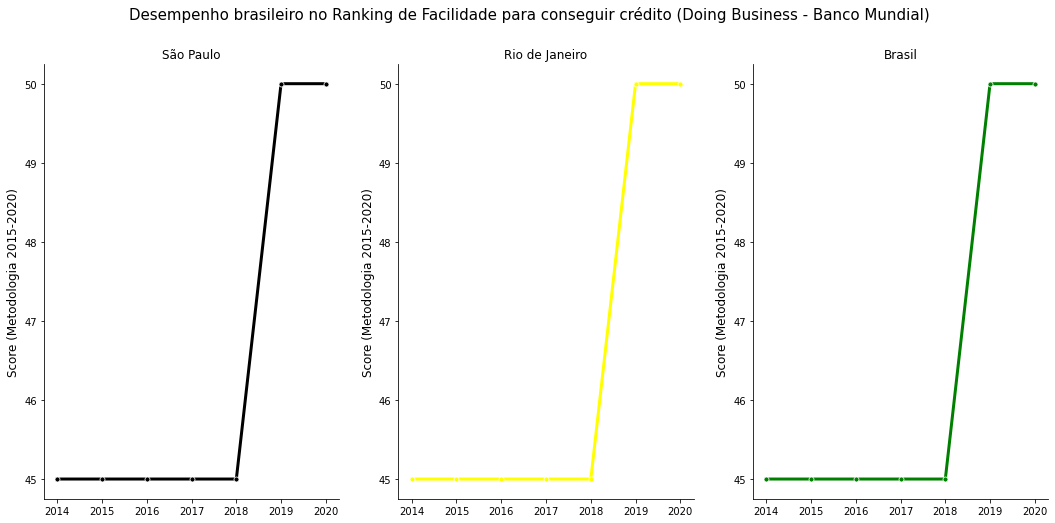

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,8))
sns.lineplot(data=df_get_credit[df_get_credit['Economy']=='Brazil São Paulo'], 
            x='DB Year', y='Score-Getting credit (DB15-20 methodology)', ax=axs[0], color='black', alpha=1, linewidth=3, marker='.',
             ms=10) #São Paulo
sns.lineplot(data=df_get_credit[df_get_credit['Economy']=='Brazil Rio de Janeiro'], 
            x='DB Year', y='Score-Getting credit (DB15-20 methodology)', ax=axs[1], color='yellow', alpha=1, linewidth=3, marker='.',
             ms=10) #Rio de Janeiro
sns.lineplot(data=df_get_credit[df_get_credit['Economy']=='Brazil'], 
            x='DB Year', y='Score-Getting credit (DB15-20 methodology)', ax=axs[2], color='green', alpha=1, linewidth=3, marker='.',
             ms=10) #Brasil


axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[0].set_ylabel('Score (Metodologia 2015-2020)', fontsize=12)
axs[1].set_ylabel('Score (Metodologia 2015-2020)', fontsize=12)
axs[2].set_ylabel('Score (Metodologia 2015-2020)', fontsize=12)
axs[0].set_title('São Paulo', fontsize=12)
axs[1].set_title('Rio de Janeiro', fontsize=12)
axs[2].set_title('Brasil', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de Facilidade para conseguir crédito (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.show()

Nessa segunda métrica cuja metodologia mais atual começa em 2014, não há diferenciação entre as regiões brasileiras medidas e pouquissíma variação na pontuação ao longo dos anos. 

Nessa especificamente, esperamos baixa correlação com o desempenho do Índice Bovespa, apesar de ser cânone na teoria econômica a necessidade de crédito para a expansão da economia e seu desenvolvimento.

In [ ]:
df_pay_tax.head(2)

,Economy,Region,Income group,DB Year,Score-Paying taxes (DB17-20 methodology),Score-Total tax and contribution rate (% of profit)
0,Brazil,Latin America & Caribbean,Upper middle income,2004-01-01,NaN,NaN
1,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2004-01-01,NaN,NaN


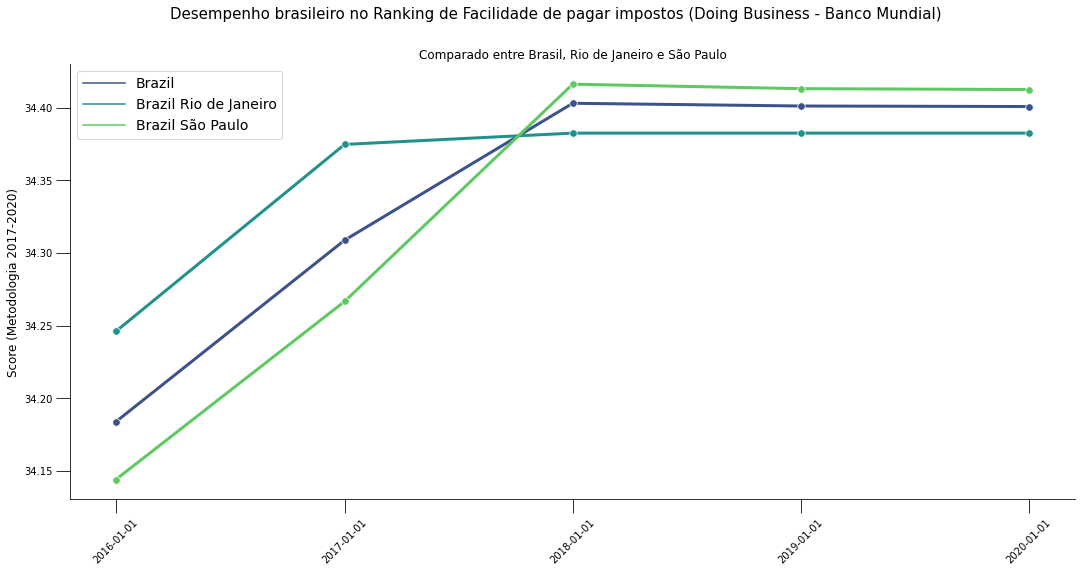

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(data=df_pay_tax, x='DB Year', y='Score-Paying taxes (DB17-20 methodology)', hue='Economy', ax=ax, palette='viridis', alpha=1, linewidth=3, marker='.',
             ms=15)

xmajor_locator = mdates.YearLocator(base=1)
ax.xaxis.set_major_locator(xmajor_locator)
plt.tick_params('x', labelrotation=45, size=14)
plt.tick_params('y', size=14)
ax.set_xlabel(None)
ax.set_ylabel('Score (Metodologia 2017-2020)', fontsize=12)
ax.set_title('Comparado entre Brasil, Rio de Janeiro e São Paulo', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de Facilidade de pagar impostos (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.legend(fontsize=14, handlelength=3)
plt.show()

No ranking de facilidade de pagar impostos é possível ver sensível melhora nas três regiões, com destaque para São Paulo que passou de último lugar em 2016 para o primeiro, a partir de 2018.

Uma outra métrica interessante relacionada com o pagamento de impostos que nos interessou e vemos logo abaixo foi a pontuação do total de impostos em relação ao share de lucro realizado dos negócios. 

In [ ]:
#Corrigindo a coluna de Score de contribuição sobre o lucro para float64 - decimais
df_pay_tax = df_pay_tax.astype({'Score-Total tax and contribution rate (% of profit)':'float64'})

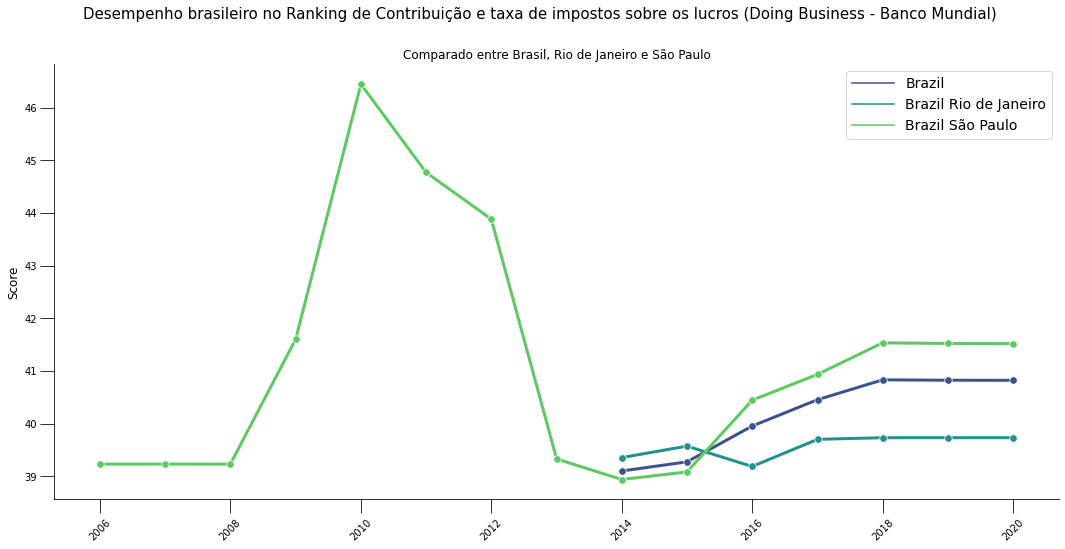

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(data=df_pay_tax, x='DB Year', y='Score-Total tax and contribution rate (% of profit)', hue='Economy', ax=ax, palette='viridis', alpha=1, linewidth=3, marker='.',
             ms=15)

plt.tick_params('x', labelrotation=45, size=14)
plt.tick_params('y', size=14)
ax.set_xlabel(None)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparado entre Brasil, Rio de Janeiro e São Paulo', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de Contribuição e taxa de impostos sobre os lucros (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.legend(fontsize=14, handlelength=3)
plt.show()

Aqui, as curvas seguem caminhos diferentes. São Paulo tem expressivo aumento na pontuação entre 2008 e 2013 que cai para abaixo das outras regiões porém rapidamente se recupera, enquanto o Brasil como um todo mostra tendência de estabilidade após subir, o Rio de Janeiro, faz o caminho inverso ao diminuir sua pontuação e se estabilizar.

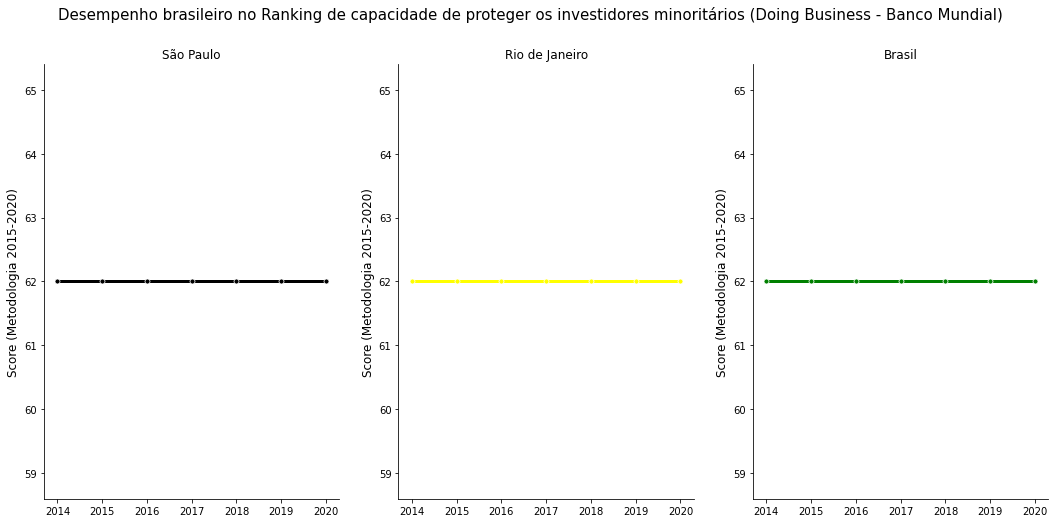

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,8))
sns.lineplot(data=df_pmi[df_pmi['Economy']=='Brazil São Paulo'], 
            x='DB Year', y='Score-Protecting minority investors (DB15-20 methodology)', ax=axs[0], color='black', alpha=1, linewidth=3, marker='.',
             ms=10) #São Paulo
sns.lineplot(data=df_pmi[df_pmi['Economy']=='Brazil Rio de Janeiro'], 
            x='DB Year', y='Score-Protecting minority investors (DB15-20 methodology)', ax=axs[1], color='yellow', alpha=1, linewidth=3, marker='.',
             ms=10) #Rio de Janeiro
sns.lineplot(data=df_pmi[df_pmi['Economy']=='Brazil'], 
            x='DB Year', y='Score-Protecting minority investors (DB15-20 methodology)', ax=axs[2], color='green', alpha=1, linewidth=3, marker='.',
             ms=10) #Brasil


axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[0].set_ylabel('Score (Metodologia 2015-2020)', fontsize=12)
axs[1].set_ylabel('Score (Metodologia 2015-2020)', fontsize=12)
axs[2].set_ylabel('Score (Metodologia 2015-2020)', fontsize=12)
axs[0].set_title('São Paulo', fontsize=12)
axs[1].set_title('Rio de Janeiro', fontsize=12)
axs[2].set_title('Brasil', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de capacidade de proteger os investidores minoritários (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.show()

Aqui, assim como na métrica de facilidade de conseguir crédito não há diferenciação entre as regiões brasileiras. Porém, pode se ver que nesse aspecto econômico o Brasil não avançou ao longo dos anos. Com uma pontuação mediana indicando algum grau de proteção aos investidores minoritários.

Por não haver variação entre os anos, esperamos baixa correlação com a performance do Índice Bovespa. No entanto, com a queda de juros no Brasil durante o período de 2017 a 2021 (apesar da retomada da política monetária mais apertada por parte do Banco Central brasileiro mais recentemente), [o número de investidores pessoa física](https://www.b3.com.br/pt_br/noticias/4-milhoes-de-pfs.htm) aumentou imensamente batendo recordes, o que deve levar a um futuro movimento dos reguladores sobre mais proteção para esses investidores.

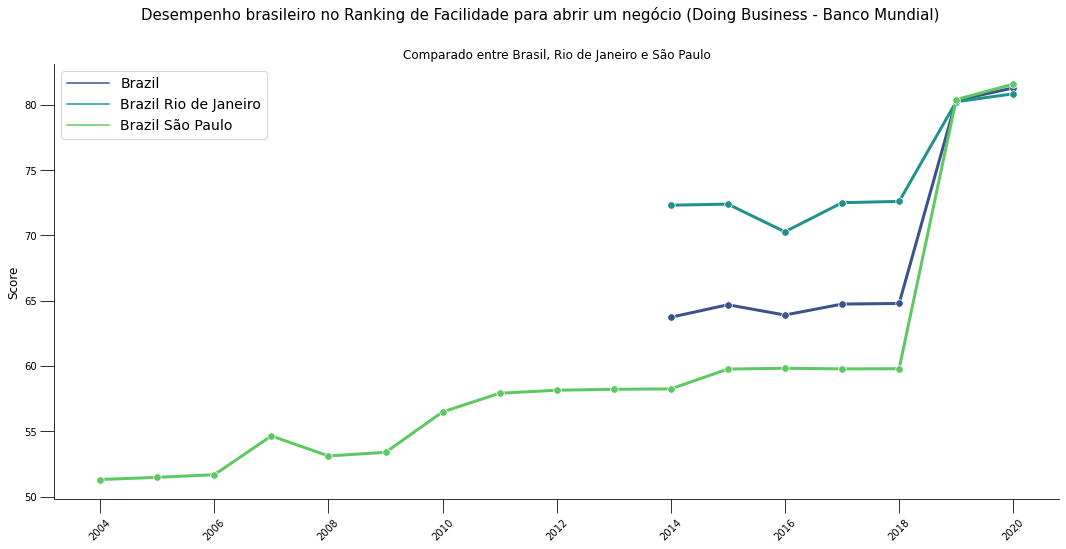

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(data=df_stab, x='DB Year', y='Score-Starting a business', hue='Economy', ax=ax, palette='viridis', alpha=1, linewidth=3, marker='.',
             ms=15)


plt.tick_params('x', labelrotation=45, size=14)
plt.tick_params('y', size=14)
ax.set_xlabel(None)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparado entre Brasil, Rio de Janeiro e São Paulo', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de Facilidade para abrir um negócio (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.legend(fontsize=14, handlelength=3)
plt.show()

Nessa métrica, ao termos dados desde o ínicio, é possível visualizar o grande avanço do país em relação à facilidade de se abrir um negócio, uma métrica relacionada à quantidade de burocracias, horas e documentos necessários para começar um *business*.

O bruto aumento da pontuação em 2019 nos parece bastante relacionada com a promulgação da [Lei de Liberdade Econômica - L13874](http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/L13874.htm) nesse mesmo ano, que facilitou e diminuiu o número de documentos e burocracias para abertura de negócios, principalmente aquelas tipicamente classificadas como [Pequenas e Médias Empresas](https://www.sebrae.com.br/sites/PortalSebrae/artigos/entenda-as-diferencas-entre-microempresa-pequena-empresa-e-mei,03f5438af1c92410VgnVCM100000b272010aRCRD) (PME's).

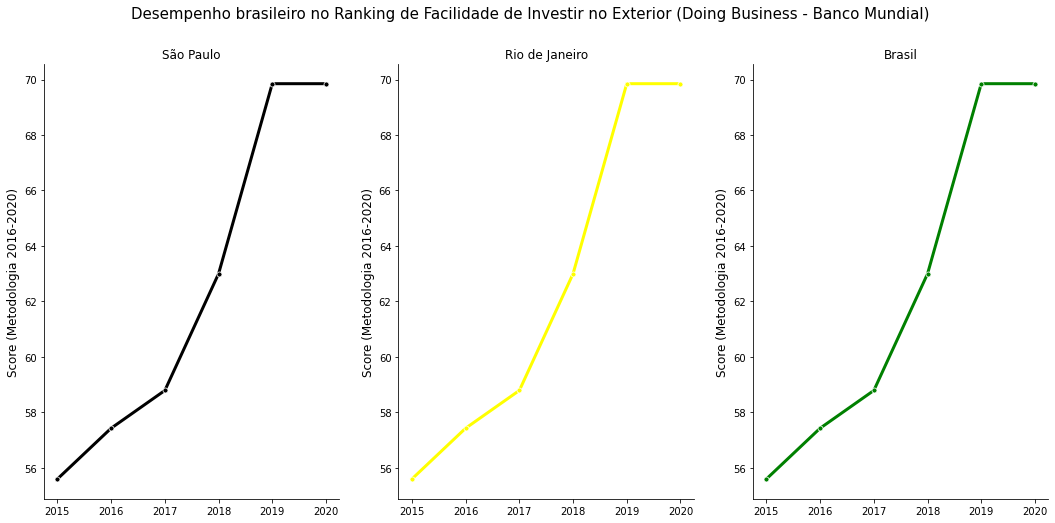

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,8))
sns.lineplot(data=df_tacb[df_tacb['Economy']=='Brazil São Paulo'], 
            x='DB Year', y='Score-Trading across borders (DB16-20 methodology)', ax=axs[0], color='black', alpha=1, linewidth=3, marker='.',
             ms=10) #São Paulo
sns.lineplot(data=df_tacb[df_tacb['Economy']=='Brazil Rio de Janeiro'], 
            x='DB Year', y='Score-Trading across borders (DB16-20 methodology)', ax=axs[1], color='yellow', alpha=1, linewidth=3, marker='.',
             ms=10) #Rio de Janeiro
sns.lineplot(data=df_tacb[df_tacb['Economy']=='Brazil'], 
            x='DB Year', y='Score-Trading across borders (DB16-20 methodology)', ax=axs[2], color='green', alpha=1, linewidth=3, marker='.',
             ms=10) #Brasil


axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[0].set_ylabel('Score (Metodologia 2016-2020)', fontsize=12)
axs[1].set_ylabel('Score (Metodologia 2016-2020)', fontsize=12)
axs[2].set_ylabel('Score (Metodologia 2016-2020)', fontsize=12)
axs[0].set_title('São Paulo', fontsize=12)
axs[1].set_title('Rio de Janeiro', fontsize=12)
axs[2].set_title('Brasil', fontsize=12)
plt.suptitle('Desempenho brasileiro no Ranking de Facilidade de Investir no Exterior (Doing Business - Banco Mundial)', fontsize=15)

sns.despine()
plt.show()

Finalmente, na última métrica que estamos olhando versa sobre a facilidade de exportar e importar. Essa também mantém a curva igual para todas as regiões, porém é interessante observarmos como a métrica sobe a partir das simplificações e diminuição no número de documentos solicitados para os processos, como é o caso da implementação da Declaração Única de Exportação. Outro fator que entendemos importante para a melhoria dessa pontuação é a aprovação e começo da utilização da DUIMP (Delcaração Única de Importação).

In [ ]:
#PRÓXIMO PASSO, juntar as pontuações num único dataframe e plotar a correlação entre elas
#EM SEGUIDA, juntar com o Índice Bovespa e plotar a correlação entre elas
#FAZER UMA CONCLUSÃO SOBRE OS RESULTADOS

In [ ]:
#Concatenando os Dataframes
df_metricas_final = df_ease_db.join(df_get_credit['Score-Getting credit (DB15-20 methodology)'])\
                              .join(df_pay_tax['Score-Paying taxes (DB17-20 methodology)'])\
                              .join(df_pay_tax['Score-Total tax and contribution rate (% of profit)'])\
                              .join(df_pmi['Score-Protecting minority investors (DB15-20 methodology)'])\
                              .join(df_stab['Score-Starting a business'])\
                              .join(df_tacb['Score-Trading across borders (DB16-20 methodology)'])
df_metricas_final.head()

,Economy,Region,Income group,DB Year,Ease of doing business score (DB17-20 methodology),Score-Getting credit (DB15-20 methodology),Score-Paying taxes (DB17-20 methodology),Score-Total tax and contribution rate (% of profit),Score-Protecting minority investors (DB15-20 methodology),Score-Starting a business,Score-Trading across borders (DB16-20 methodology)
0,Brazil,Latin America & Caribbean,Upper middle income,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil São Paulo,Latin America & Caribbean,Upper middle income,2004-01-01,NaN,NaN,NaN,NaN,NaN,51.3096,NaN
3,Brazil,Latin America & Caribbean,Upper middle income,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil Rio de Janeiro,Latin America & Caribbean,Upper middle income,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Correlações e Conclusões

---
Na seção final, olhamos para as correlações entre as próprias métricas, em seguida para a correlação deles com os fechamentos do IBOVESPA e desenvolvemos nossa conclusão sobre o trabalho.


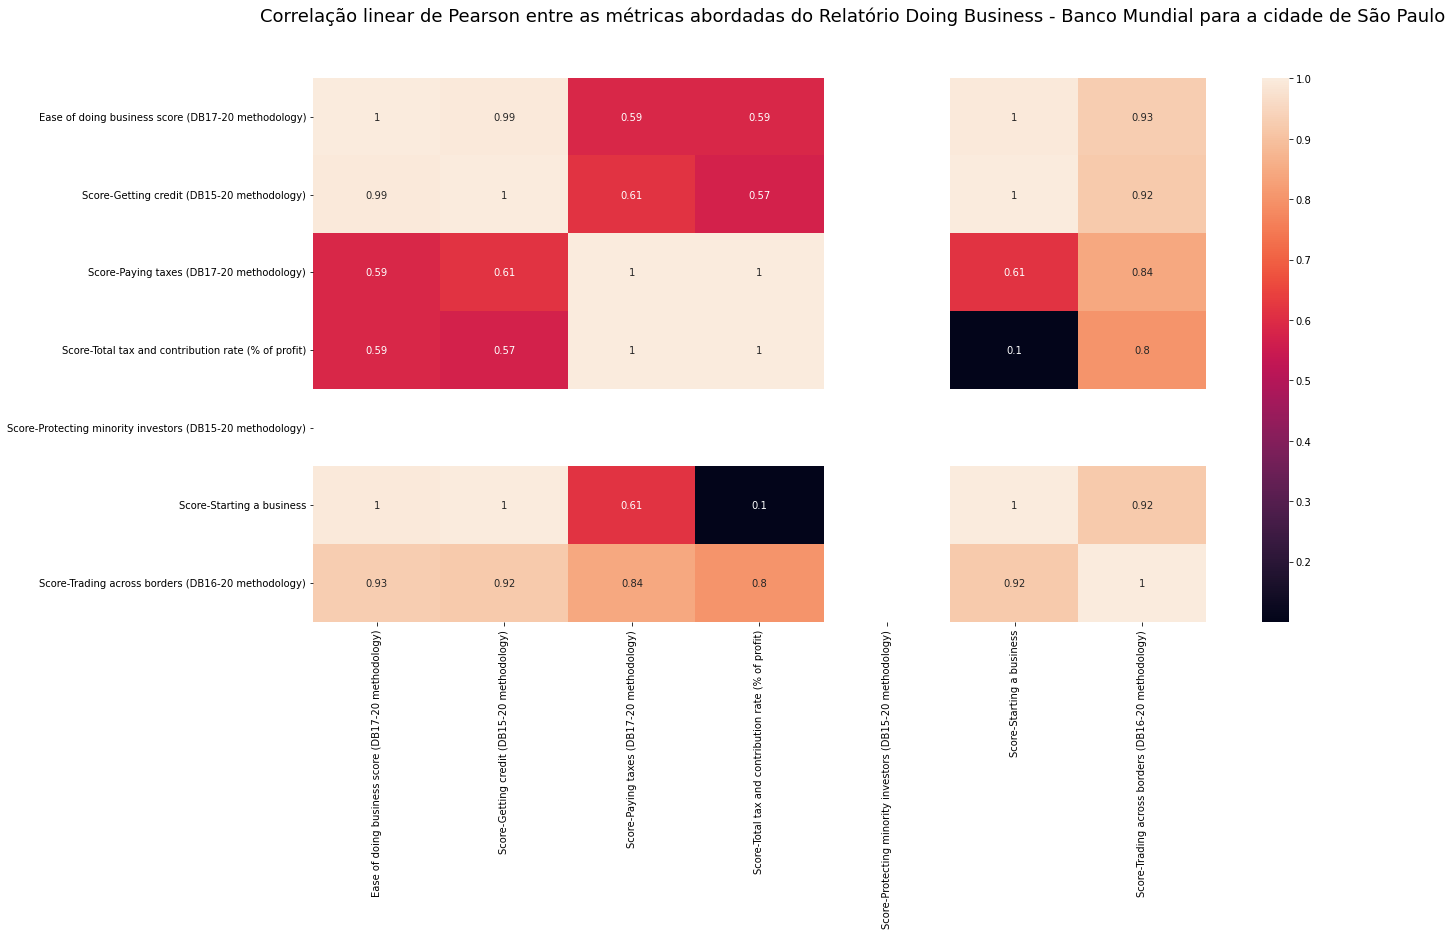

In [ ]:
#Observando a correlação de Pearson entre as métricas para São Paulo
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_metricas_final[df_metricas_final['Economy']=='Brazil São Paulo'].corr(), ax=ax, annot=True)

plt.suptitle('Correlação linear de Pearson entre as métricas abordadas do Relatório Doing Business - Banco Mundial para a cidade de São Paulo', fontsize=18)
plt.show()

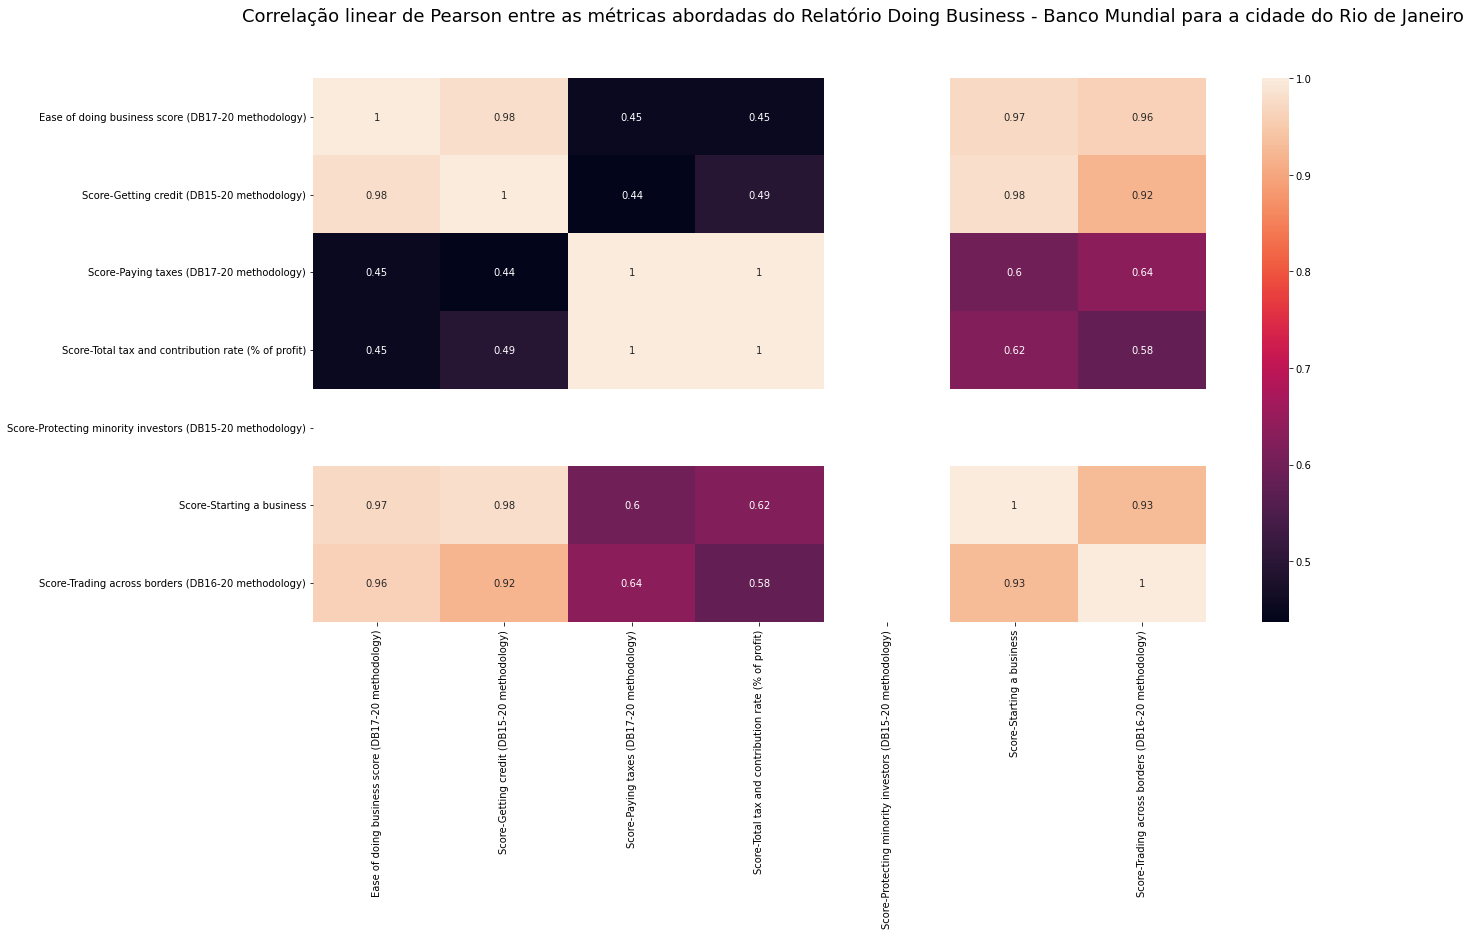

In [ ]:
#Observando a correlação de Pearson entre as métricas para Rio de Janeiro
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_metricas_final[df_metricas_final['Economy']=='Brazil Rio de Janeiro'].corr(), ax=ax, annot=True)

plt.suptitle('Correlação linear de Pearson entre as métricas abordadas do Relatório Doing Business - Banco Mundial para a cidade do Rio de Janeiro', fontsize=18)
plt.show()

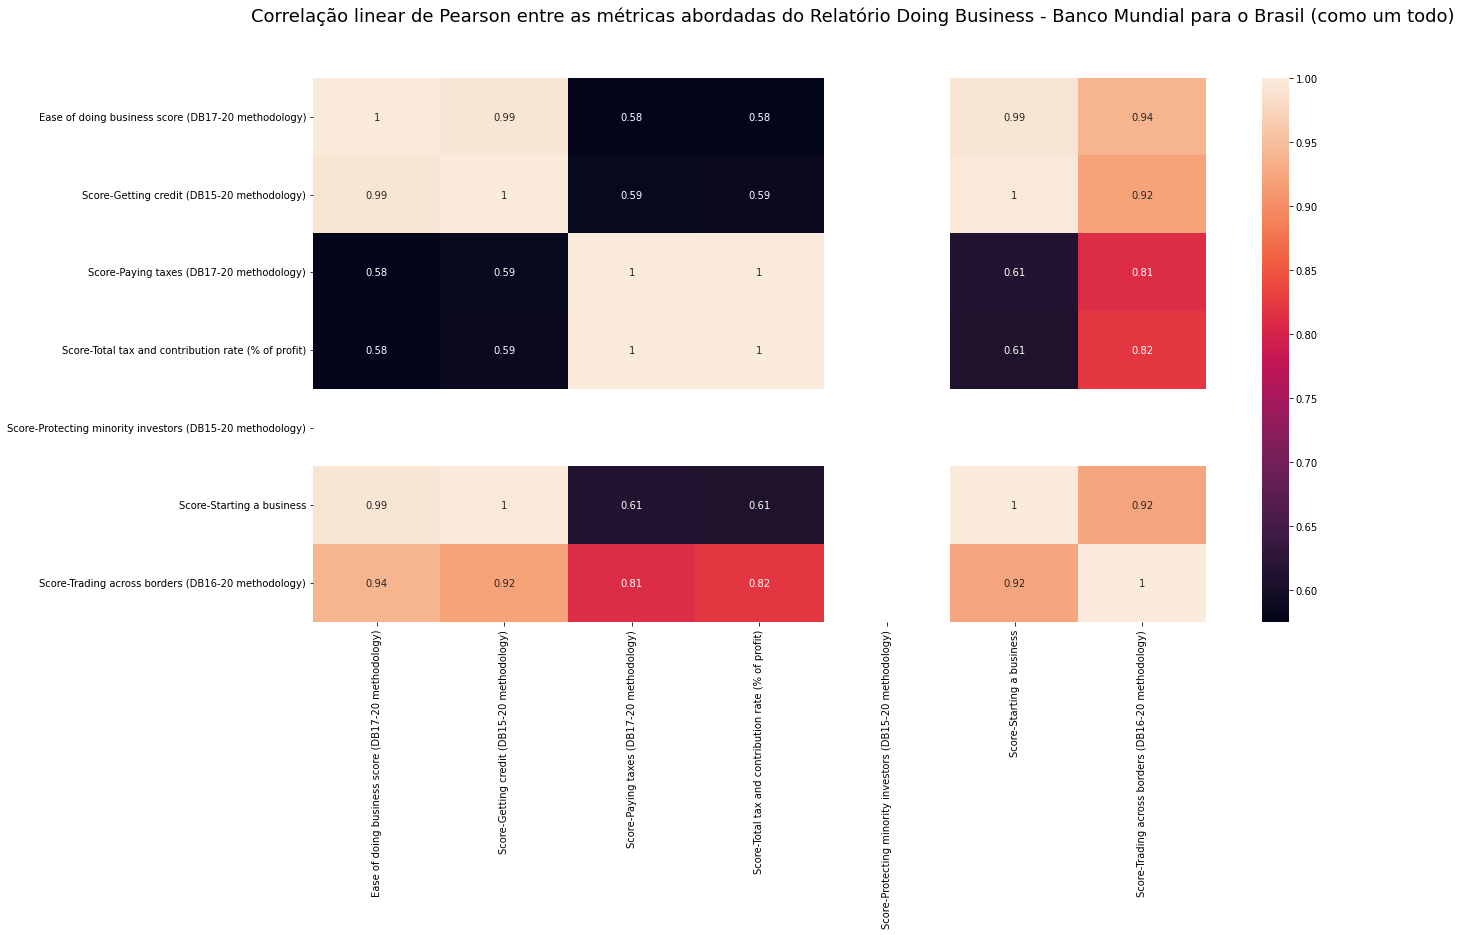

In [ ]:
#Observando a correlação de Pearson entre as métricas para Brasil em geral
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_metricas_final[df_metricas_final['Economy']=='Brazil'].corr(), ax=ax, annot=True)

plt.suptitle('Correlação linear de Pearson entre as métricas abordadas do Relatório Doing Business - Banco Mundial para o Brasil (como um todo)', fontsize=18)
plt.show()

Nossa primeira observação, é a de que a métrica de Proteção dos investidores minoritários parece não se relacionar com nenhuma das outras.

Nos surpreendeu que a métrica de impostos em % dos lucros tenha uma leve correlação com a facilidade de começar um negócio em São Paulo, o que pode indicar um descolamento entre como se paga impostos e sua relação com os negócios.

Interessante ver como o que citamos acerca da capacidade de ter crédito se relaciona bem com o *score* generalizado e com a métrica de abrir um negócio (No Brasil como um todo e em São Paulo a correlação chega a 100%). Visto que a metologia de abrir um negócio envolve a quantidade de capital mínimo para abertura, o que leva a uma facilidade no crédito uma garantia de acesso a esse mínimo.

In [ ]:
#Preparando dataframe do IBOVESPA
df_ibov.head().sort_values(by='data_ref')

,data_ref,year,month,day,fechamento
0,2006-05-09 16:56:00,2006,5,9,41515.0
1,2006-05-10 16:56:00,2006,5,10,41979.0
2,2006-05-11 16:56:00,2006,5,11,41751.0
3,2006-05-12 16:56:00,2006,5,12,40847.0
4,2006-05-15 16:56:00,2006,5,15,40211.0


In [ ]:
list_fechamentos = []
for year in df_ibov['year'].unique():
  list_fechamentos.append(df_ibov[df_ibov['year']==year].iloc[-1,4])
df_ibov_fechamentos = pd.DataFrame(list_fechamentos, columns=['fechamentos_anuais_ibov'], index=df_ibov['year'].unique())
df_ibov_fechamentos = df_ibov_fechamentos.reset_index(drop=False).rename(columns={'index':'Year'})
df_ibov_fechamentos['Year'] = pd.to_datetime(df_ibov_fechamentos['Year'], yearfirst=True, format='%Y', exact=False)

In [ ]:
df_metricas_final = df_metricas_final.rename(columns={'DB Year':'Year'})

In [ ]:
#Plotando Correlação de Pearson entre as métricas e o IBOVESPA
df_metricas_final_v2 = df_metricas_final.merge(df_ibov_fechamentos[['Year','fechamentos_anuais_ibov']], on='Year', how='left')

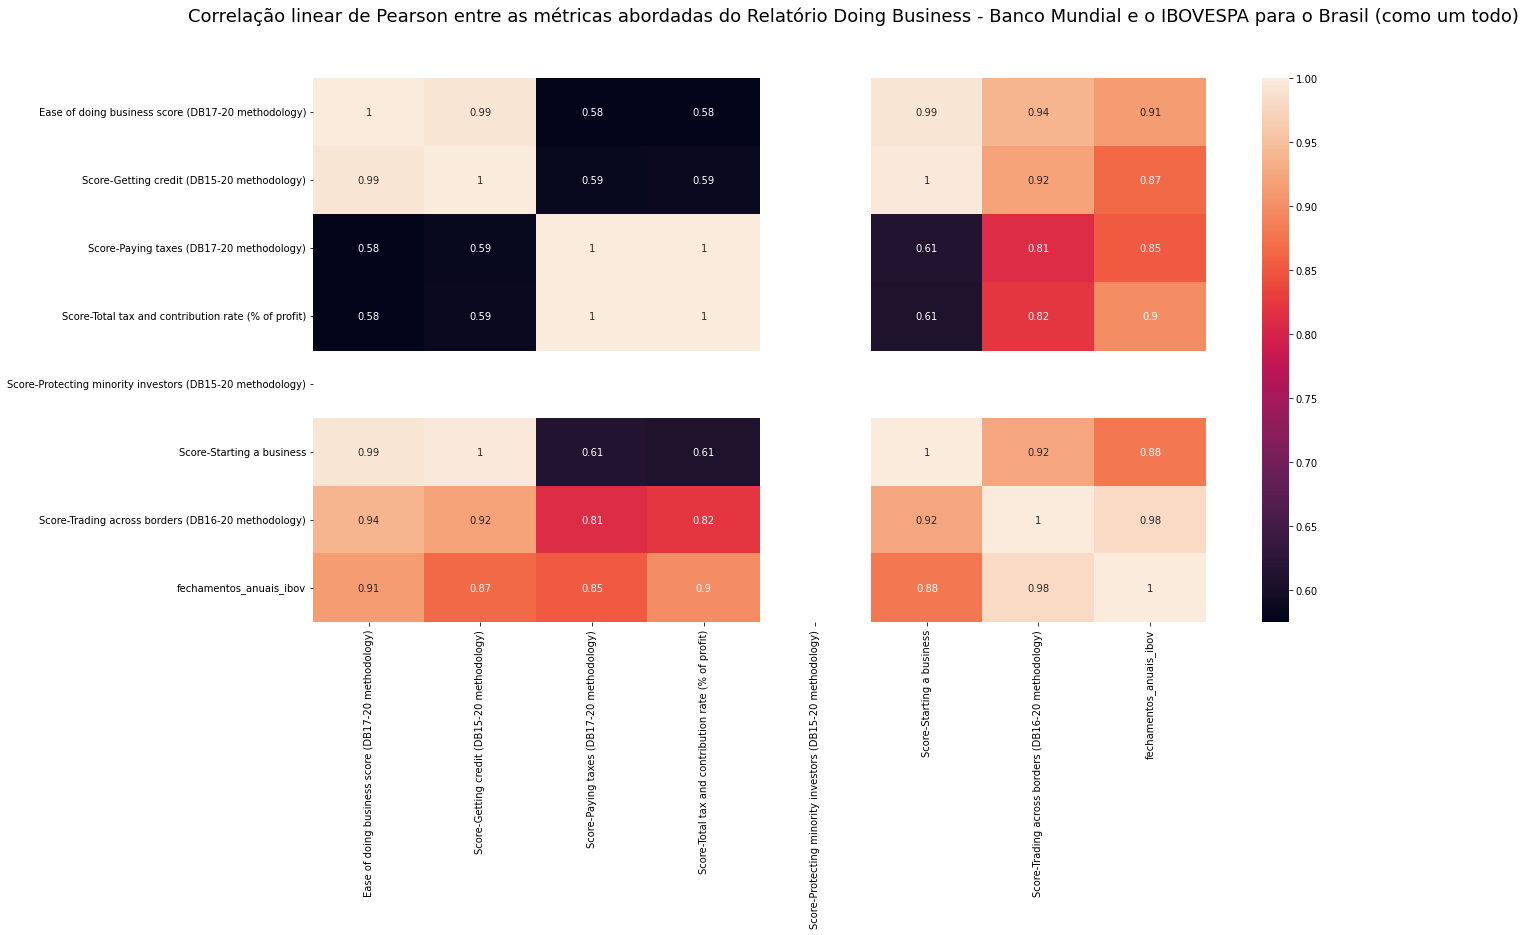

In [ ]:
#Observando a correlação de Pearson entre as métricas para Brasil em geral
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_metricas_final_v2[df_metricas_final['Economy']=='Brazil'].corr(), ax=ax, annot=True)

plt.suptitle('Correlação linear de Pearson entre as métricas abordadas do Relatório Doing Business - Banco Mundial e o IBOVESPA para o Brasil (como um todo)', fontsize=18)
plt.show()

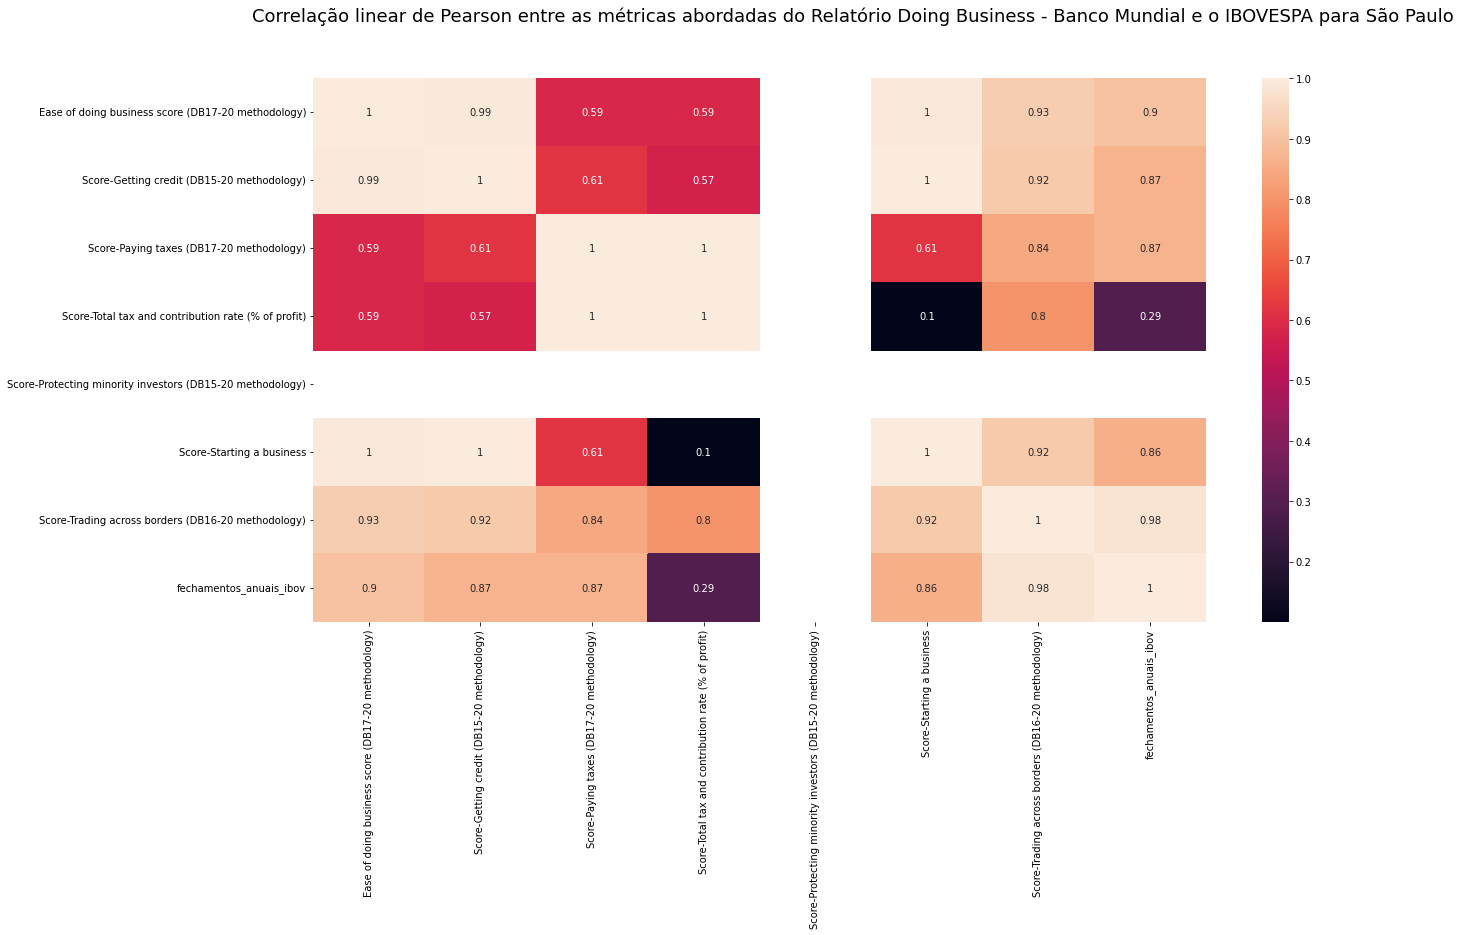

In [ ]:
#Observando a correlação de Pearson entre as métricas para Brasil em geral
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_metricas_final_v2[df_metricas_final['Economy']=='Brazil São Paulo'].corr(), ax=ax, annot=True)

plt.suptitle('Correlação linear de Pearson entre as métricas abordadas do Relatório Doing Business - Banco Mundial e o IBOVESPA para São Paulo', fontsize=18)
plt.show()

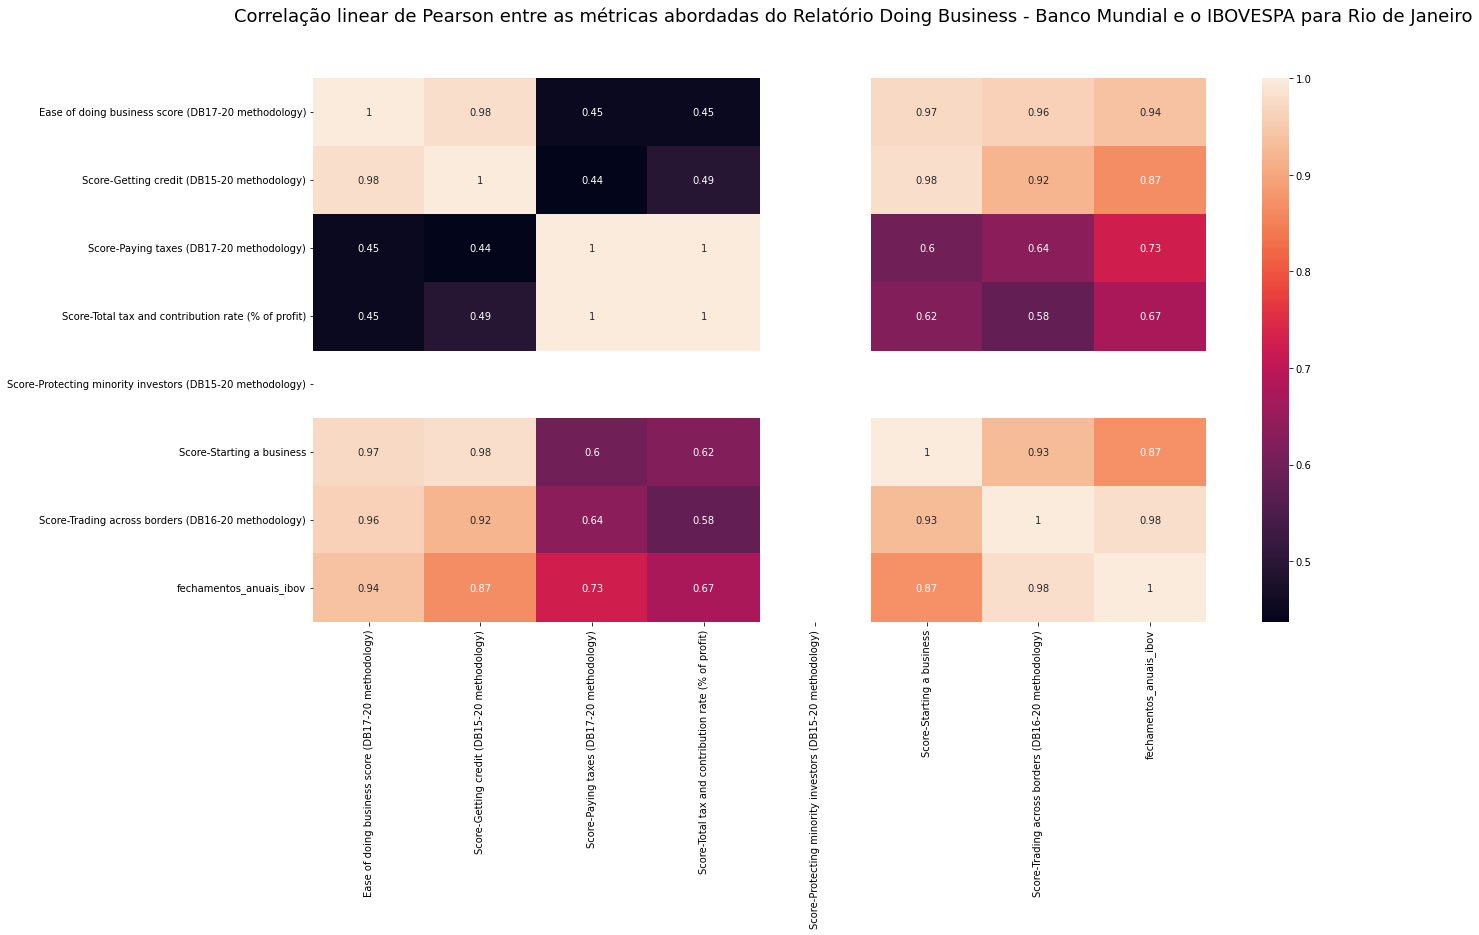

In [ ]:
#Observando a correlação de Pearson entre as métricas para Brasil em geral
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_metricas_final_v2[df_metricas_final['Economy']=='Brazil Rio de Janeiro'].corr(), ax=ax, annot=True)

plt.suptitle('Correlação linear de Pearson entre as métricas abordadas do Relatório Doing Business - Banco Mundial e o IBOVESPA para Rio de Janeiro', fontsize=18)
plt.show()